In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set()

In [2]:
data = pd.read_csv(r'E:/Downloads/Projects/Cuisine_Prediction-Problem3_ML-AI-main/restaurant_data.csv')

In [3]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),order_date
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,2022-03-23
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,2022-04-16
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,2022-03-14
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,2022-05-09
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,2022-03-19


In [4]:
data["approx_cost(for two people)"].isnull().sum()

346

In [5]:
data["approx_cost(for two people)"].value_counts()

300      7576
400      6562
500      4980
200      4857
600      3714
         ... 
469         1
5,000       1
3,700       1
60          1
560         1
Name: approx_cost(for two people), Length: 70, dtype: int64

In [6]:
data.dropna(inplace=True)

In [7]:
data

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),order_date
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,2022-03-23
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,2022-04-16
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,2022-03-14
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,2022-05-09
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,2022-03-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51705,https://www.zomato.com/bangalore/izakaya-gastr...,"2nd Floor, Iona, Virginia Mall, Whitefield Mai...",Izakaya Gastro Pub,Yes,Yes,3.8 /5,128,+91 7625087121\n+91 8050587483,Whitefield,"Bar, Casual Dining","Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...","North Indian, Continental, Mediterranean","1,200","[('Rated 3.0', ""RATED\n Nice place to hangout...",[],Pubs and bars,Whitefield,2022-05-24
51707,https://www.zomato.com/bangalore/m-bar-bengalu...,"Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...",M Bar - Bengaluru Marriott Hotel Whitefield,No,No,3.9 /5,77,080 49435000,Whitefield,"Fine Dining, Bar",Rooftop Ambience,Finger Food,"2,000","[('Rated 4.0', 'RATED\n Went there post dinne...",[],Pubs and bars,Whitefield,2022-05-16
51708,https://www.zomato.com/bangalore/keys-cafe-key...,"Keys Hotel, 6, 1st Phase Industrial Area, Near...",Keys Cafe - Keys Hotel,No,No,2.8 /5,161,080 39451000\n+91 8884038484,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian","1,200","[('Rated 3.0', 'RATED\n Place is good not tha...",[],Pubs and bars,Whitefield,2022-03-22
51711,https://www.zomato.com/bangalore/bhagini-2-whi...,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5 /5,81,080 65951222,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield,2022-03-30


In [8]:
data["approx_cost(for two people)"].value_counts()

400      2467
500      2271
600      2170
300      1688
800      1658
1,000    1242
700      1160
1,200     903
200       862
1,500     858
450       720
250       697
750       652
650       637
350       553
900       518
1,300     497
1,100     462
1,400     446
550       440
150       367
2,000     297
1,600     241
1,700     233
1,800     189
3,000     159
2,500     143
850       122
100       117
2,100      63
1,900      58
950        47
2,200      39
2,800      31
3,500      25
4,000      24
2,400      22
1,350      18
180        17
3,400      13
230        10
1,250       9
40          8
1,650       6
1,450       5
2,600       4
330         4
4,100       4
1,050       4
120         2
6,000       2
3,200       2
4,500       2
2,700       2
5,000       1
3,700       1
2,300       1
Name: approx_cost(for two people), dtype: int64

In [9]:
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].str.replace(',','')

In [10]:
data

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),order_date
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,2022-03-23
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,2022-04-16
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,2022-03-14
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,2022-05-09
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,2022-03-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51705,https://www.zomato.com/bangalore/izakaya-gastr...,"2nd Floor, Iona, Virginia Mall, Whitefield Mai...",Izakaya Gastro Pub,Yes,Yes,3.8 /5,128,+91 7625087121\n+91 8050587483,Whitefield,"Bar, Casual Dining","Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...","North Indian, Continental, Mediterranean",1200,"[('Rated 3.0', ""RATED\n Nice place to hangout...",[],Pubs and bars,Whitefield,2022-05-24
51707,https://www.zomato.com/bangalore/m-bar-bengalu...,"Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...",M Bar - Bengaluru Marriott Hotel Whitefield,No,No,3.9 /5,77,080 49435000,Whitefield,"Fine Dining, Bar",Rooftop Ambience,Finger Food,2000,"[('Rated 4.0', 'RATED\n Went there post dinne...",[],Pubs and bars,Whitefield,2022-05-16
51708,https://www.zomato.com/bangalore/keys-cafe-key...,"Keys Hotel, 6, 1st Phase Industrial Area, Near...",Keys Cafe - Keys Hotel,No,No,2.8 /5,161,080 39451000\n+91 8884038484,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian",1200,"[('Rated 3.0', 'RATED\n Place is good not tha...",[],Pubs and bars,Whitefield,2022-03-22
51711,https://www.zomato.com/bangalore/bhagini-2-whi...,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5 /5,81,080 65951222,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield,2022-03-30


In [11]:
data["approx_cost(for two people)"].isnull().sum()

0

In [12]:
data['approx_cost(for two people)']=data["approx_cost(for two people)"].astype(int)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23193 entries, 0 to 51715
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          23193 non-null  object
 1   address                      23193 non-null  object
 2   name                         23193 non-null  object
 3   online_order                 23193 non-null  object
 4   book_table                   23193 non-null  object
 5   rate                         23193 non-null  object
 6   votes                        23193 non-null  int64 
 7   phone                        23193 non-null  object
 8   location                     23193 non-null  object
 9   rest_type                    23193 non-null  object
 10  dish_liked                   23193 non-null  object
 11  cuisines                     23193 non-null  object
 12  approx_cost(for two people)  23193 non-null  int32 
 13  reviews_list                 23

In [14]:
data['requirement']=data['votes']*data['approx_cost(for two people)']

In [15]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'order_date', 'requirement'],
      dtype='object')

In [16]:
data.drop(["url","online_order","book_table","rate",'phone','rest_type','reviews_list','listed_in(type)'] ,axis=1 ,inplace=True) 

In [17]:
data.drop(['menu_item'],axis=1,inplace=True)

In [18]:
data

,address,name,votes,location,dish_liked,cuisines,approx_cost(for two people),listed_in(city),order_date,requirement
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,775,Banashankari,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Banashankari,2022-03-23,620000
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,787,Banashankari,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Banashankari,2022-04-16,629600
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,918,Banashankari,"Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Banashankari,2022-03-14,734400
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,88,Banashankari,Masala Dosa,"South Indian, North Indian",300,Banashankari,2022-05-09,26400
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,166,Basavanagudi,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Banashankari,2022-03-19,99600
...,...,...,...,...,...,...,...,...,...,...
51705,"2nd Floor, Iona, Virginia Mall, Whitefield Mai...",Izakaya Gastro Pub,128,Whitefield,"Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...","North Indian, Continental, Mediterranean",1200,Whitefield,2022-05-24,153600
51707,"Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...",M Bar - Bengaluru Marriott Hotel Whitefield,77,Whitefield,Rooftop Ambience,Finger Food,2000,Whitefield,2022-05-16,154000
51708,"Keys Hotel, 6, 1st Phase Industrial Area, Near...",Keys Cafe - Keys Hotel,161,Whitefield,"Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian",1200,Whitefield,2022-03-22,193200
51711,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,81,Whitefield,"Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,Whitefield,2022-03-30,64800


In [19]:
data['cuisines'].value_counts()

North Indian                           1144
North Indian, Chinese                   777
South Indian                            359
Cafe                                    273
South Indian, North Indian, Chinese     233
                                       ... 
Thai, Chinese, Momos                      1
Chinese, Thai, Seafood, Malaysian         1
Ice Cream, Desserts, Juices               1
Continental, North Indian, Mughlai        1
Healthy Food, Salad, Mediterranean        1
Name: cuisines, Length: 1687, dtype: int64

In [20]:
data["Day"] = pd.to_datetime(data.order_date,format="%Y/%m/%d").dt.day 

In [21]:
data["Month"] = pd.to_datetime(data.order_date,format="%Y/%m/%d").dt. month

In [22]:
data

,address,name,votes,location,dish_liked,cuisines,approx_cost(for two people),listed_in(city),order_date,requirement,Day,Month
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,775,Banashankari,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Banashankari,2022-03-23,620000,23,3
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,787,Banashankari,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Banashankari,2022-04-16,629600,16,4
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,918,Banashankari,"Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Banashankari,2022-03-14,734400,14,3
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,88,Banashankari,Masala Dosa,"South Indian, North Indian",300,Banashankari,2022-05-09,26400,9,5
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,166,Basavanagudi,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Banashankari,2022-03-19,99600,19,3
...,...,...,...,...,...,...,...,...,...,...,...,...
51705,"2nd Floor, Iona, Virginia Mall, Whitefield Mai...",Izakaya Gastro Pub,128,Whitefield,"Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...","North Indian, Continental, Mediterranean",1200,Whitefield,2022-05-24,153600,24,5
51707,"Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...",M Bar - Bengaluru Marriott Hotel Whitefield,77,Whitefield,Rooftop Ambience,Finger Food,2000,Whitefield,2022-05-16,154000,16,5
51708,"Keys Hotel, 6, 1st Phase Industrial Area, Near...",Keys Cafe - Keys Hotel,161,Whitefield,"Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian",1200,Whitefield,2022-03-22,193200,22,3
51711,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,81,Whitefield,"Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,Whitefield,2022-03-30,64800,30,3


In [23]:
data['order_date'].value_counts()

2022-05-17    297
2022-05-30    289
2022-03-28    282
2022-03-23    279
2022-04-18    278
             ... 
2022-04-25    229
2022-05-22    225
2022-03-10    216
2022-05-23    215
2022-03-30    214
Name: order_date, Length: 91, dtype: int64

In [24]:
data.drop(['order_date'],axis=1,inplace=True)

In [25]:
data

,address,name,votes,location,dish_liked,cuisines,approx_cost(for two people),listed_in(city),requirement,Day,Month
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,775,Banashankari,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Banashankari,620000,23,3
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,787,Banashankari,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Banashankari,629600,16,4
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,918,Banashankari,"Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Banashankari,734400,14,3
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,88,Banashankari,Masala Dosa,"South Indian, North Indian",300,Banashankari,26400,9,5
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,166,Basavanagudi,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Banashankari,99600,19,3
...,...,...,...,...,...,...,...,...,...,...,...
51705,"2nd Floor, Iona, Virginia Mall, Whitefield Mai...",Izakaya Gastro Pub,128,Whitefield,"Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...","North Indian, Continental, Mediterranean",1200,Whitefield,153600,24,5
51707,"Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...",M Bar - Bengaluru Marriott Hotel Whitefield,77,Whitefield,Rooftop Ambience,Finger Food,2000,Whitefield,154000,16,5
51708,"Keys Hotel, 6, 1st Phase Industrial Area, Near...",Keys Cafe - Keys Hotel,161,Whitefield,"Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian",1200,Whitefield,193200,22,3
51711,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,81,Whitefield,"Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,Whitefield,64800,30,3


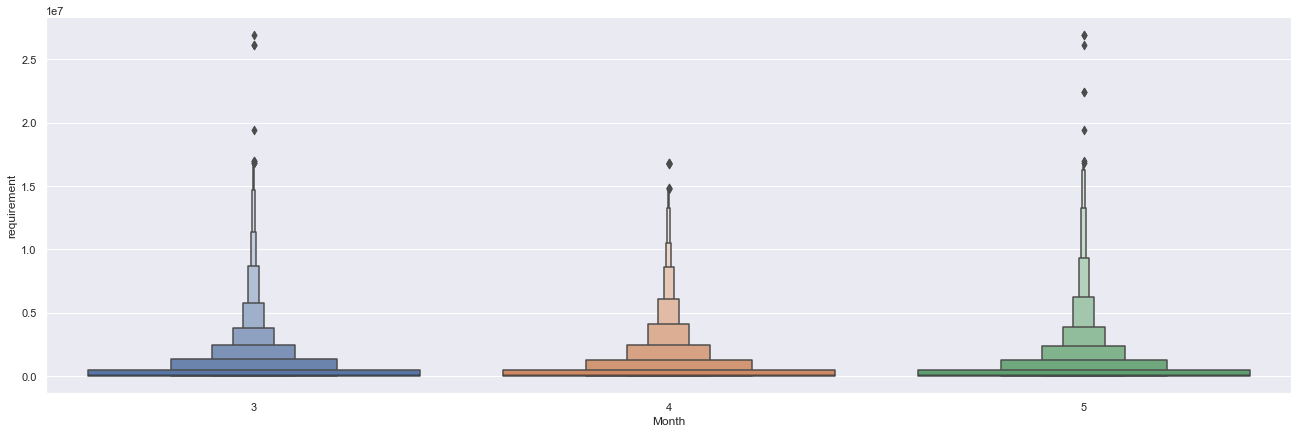

In [26]:
sns.catplot(y="requirement",x="Month",data=data.sort_values("requirement",ascending=False),kind="boxen",height=6,aspect=3)                          

In [27]:
data.drop(['dish_liked'],axis=1,inplace=True)

In [28]:
data

,address,name,votes,location,cuisines,approx_cost(for two people),listed_in(city),requirement,Day,Month
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,775,Banashankari,"North Indian, Mughlai, Chinese",800,Banashankari,620000,23,3
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,787,Banashankari,"Chinese, North Indian, Thai",800,Banashankari,629600,16,4
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,918,Banashankari,"Cafe, Mexican, Italian",800,Banashankari,734400,14,3
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,88,Banashankari,"South Indian, North Indian",300,Banashankari,26400,9,5
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,166,Basavanagudi,"North Indian, Rajasthani",600,Banashankari,99600,19,3
...,...,...,...,...,...,...,...,...,...,...
51705,"2nd Floor, Iona, Virginia Mall, Whitefield Mai...",Izakaya Gastro Pub,128,Whitefield,"North Indian, Continental, Mediterranean",1200,Whitefield,153600,24,5
51707,"Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...",M Bar - Bengaluru Marriott Hotel Whitefield,77,Whitefield,Finger Food,2000,Whitefield,154000,16,5
51708,"Keys Hotel, 6, 1st Phase Industrial Area, Near...",Keys Cafe - Keys Hotel,161,Whitefield,"Chinese, Continental, North Indian",1200,Whitefield,193200,22,3
51711,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,81,Whitefield,"Andhra, South Indian, Chinese, North Indian",800,Whitefield,64800,30,3


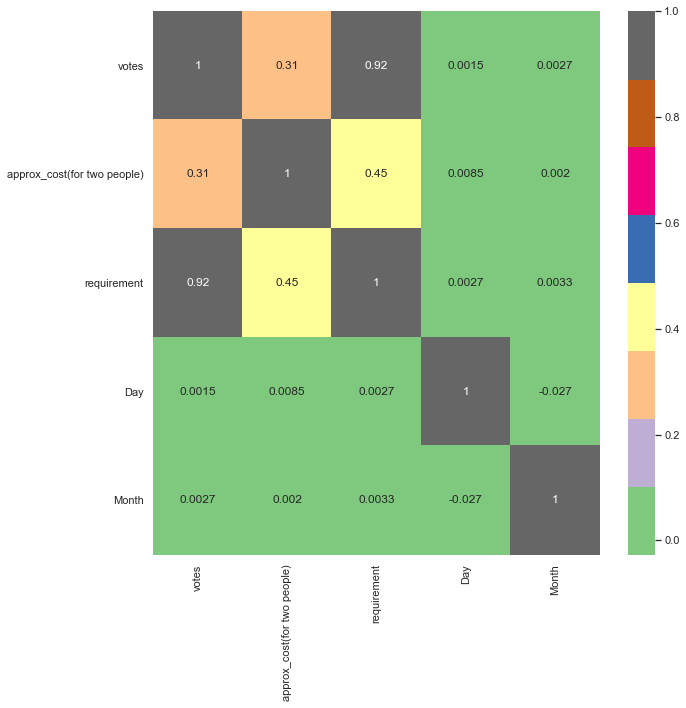

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,cmap="Accent")
plt.show()

In [30]:
data.drop(['approx_cost(for two people)','votes'],axis=1,inplace=True)

In [31]:
data

,address,name,location,cuisines,listed_in(city),requirement,Day,Month
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Banashankari,"North Indian, Mughlai, Chinese",Banashankari,620000,23,3
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Banashankari,"Chinese, North Indian, Thai",Banashankari,629600,16,4
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Banashankari,"Cafe, Mexican, Italian",Banashankari,734400,14,3
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,Banashankari,"South Indian, North Indian",Banashankari,26400,9,5
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,Basavanagudi,"North Indian, Rajasthani",Banashankari,99600,19,3
...,...,...,...,...,...,...,...,...
51705,"2nd Floor, Iona, Virginia Mall, Whitefield Mai...",Izakaya Gastro Pub,Whitefield,"North Indian, Continental, Mediterranean",Whitefield,153600,24,5
51707,"Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...",M Bar - Bengaluru Marriott Hotel Whitefield,Whitefield,Finger Food,Whitefield,154000,16,5
51708,"Keys Hotel, 6, 1st Phase Industrial Area, Near...",Keys Cafe - Keys Hotel,Whitefield,"Chinese, Continental, North Indian",Whitefield,193200,22,3
51711,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,Whitefield,"Andhra, South Indian, Chinese, North Indian",Whitefield,64800,30,3


In [32]:
data.drop(['Day'],axis=1,inplace=True)

In [33]:
data

,address,name,location,cuisines,listed_in(city),requirement,Month
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Banashankari,"North Indian, Mughlai, Chinese",Banashankari,620000,3
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Banashankari,"Chinese, North Indian, Thai",Banashankari,629600,4
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Banashankari,"Cafe, Mexican, Italian",Banashankari,734400,3
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,Banashankari,"South Indian, North Indian",Banashankari,26400,5
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,Basavanagudi,"North Indian, Rajasthani",Banashankari,99600,3
...,...,...,...,...,...,...,...
51705,"2nd Floor, Iona, Virginia Mall, Whitefield Mai...",Izakaya Gastro Pub,Whitefield,"North Indian, Continental, Mediterranean",Whitefield,153600,5
51707,"Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...",M Bar - Bengaluru Marriott Hotel Whitefield,Whitefield,Finger Food,Whitefield,154000,5
51708,"Keys Hotel, 6, 1st Phase Industrial Area, Near...",Keys Cafe - Keys Hotel,Whitefield,"Chinese, Continental, North Indian",Whitefield,193200,3
51711,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,Whitefield,"Andhra, South Indian, Chinese, North Indian",Whitefield,64800,3


In [34]:
data['cuisines'].value_counts()

North Indian                           1144
North Indian, Chinese                   777
South Indian                            359
Cafe                                    273
South Indian, North Indian, Chinese     233
                                       ... 
Thai, Chinese, Momos                      1
Chinese, Thai, Seafood, Malaysian         1
Ice Cream, Desserts, Juices               1
Continental, North Indian, Mughlai        1
Healthy Food, Salad, Mediterranean        1
Name: cuisines, Length: 1687, dtype: int64

In [35]:
data.drop(['address','listed_in(city)'],axis=1,inplace=True)

In [36]:
data.head(50)

,name,location,cuisines,requirement,Month
0,Jalsa,Banashankari,"North Indian, Mughlai, Chinese",620000,3
1,Spice Elephant,Banashankari,"Chinese, North Indian, Thai",629600,4
2,San Churro Cafe,Banashankari,"Cafe, Mexican, Italian",734400,3
3,Addhuri Udupi Bhojana,Banashankari,"South Indian, North Indian",26400,5
4,Grand Village,Basavanagudi,"North Indian, Rajasthani",99600,3
5,Timepass Dinner,Basavanagudi,North Indian,171600,4
7,Onesta,Banashankari,"Pizza, Cafe, Italian",1533600,3
8,Penthouse Cafe,Banashankari,"Cafe, Italian, Continental",226800,5
9,Smacznego,Banashankari,"Cafe, Mexican, Italian, Momos, Beverages",277200,3
10,CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...,Banashankari,Cafe,201000,5


In [37]:
data1=data.assign(cuisines=data['cuisines'].str.split(',')).explode('cuisines')

In [38]:
data1['cuisines'].value_counts()

 Chinese          6025
North Indian      5424
 North Indian     4596
 Continental      2863
Cafe              2788
                  ... 
Momos                2
 Pan Asian           2
 North Eastern       2
Singaporean          1
 Kashmiri            1
Name: cuisines, Length: 174, dtype: int64

In [39]:
data1.head(10)

,name,location,cuisines,requirement,Month
0,Jalsa,Banashankari,North Indian,620000,3
0,Jalsa,Banashankari,Mughlai,620000,3
0,Jalsa,Banashankari,Chinese,620000,3
1,Spice Elephant,Banashankari,Chinese,629600,4
1,Spice Elephant,Banashankari,North Indian,629600,4
1,Spice Elephant,Banashankari,Thai,629600,4
2,San Churro Cafe,Banashankari,Cafe,734400,3
2,San Churro Cafe,Banashankari,Mexican,734400,3
2,San Churro Cafe,Banashankari,Italian,734400,3
3,Addhuri Udupi Bhojana,Banashankari,South Indian,26400,5


In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data1['location']=le.fit_transform(data1['location'])
data1['name']=le.fit_transform(data1['name'])
data1['cuisines']=le.fit_transform(data1['cuisines'])

data1

,name,location,cuisines,requirement,Month
0,1333,1,150,620000,3
0,1333,1,63,620000,3
0,1333,1,25,620000,3
1,2501,1,114,629600,4
1,2501,1,67,629600,4
...,...,...,...,...,...
51711,310,84,96,64800,3
51711,310,84,80,64800,3
51711,310,84,25,64800,3
51711,310,84,67,64800,3


In [41]:
X = data1.drop('requirement',axis=1).values
y = data1['requirement'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=33)


In [42]:
from sklearn.ensemble import RandomForestRegressor   

In [43]:
Model_fit_Random=RandomForestRegressor(n_estimators = 200, random_state = 0) ## Intialising the model


In [44]:
Model_fit_Random.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200, random_state=0)

In [45]:
y_pred = Model_fit_Random.predict(X_test)

In [46]:
Model_fit_Random.score(X_test, y_test)

0.9808457048715147

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


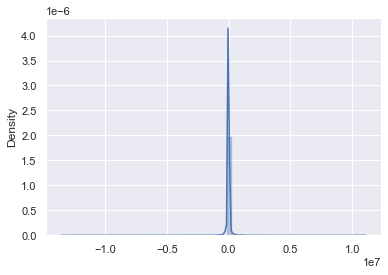

In [47]:
sns.distplot(y_test-y_pred)
plt.show()

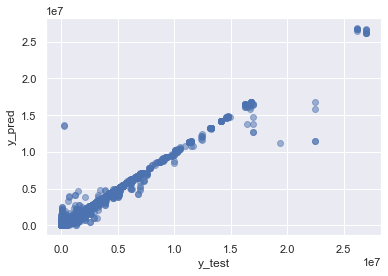

In [48]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [49]:
from sklearn import metrics

In [50]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 43055.13479610045
MSE: 60690202176.16745
RMSE: 246353.8150225554


In [51]:
metrics.r2_score(y_test, y_pred)

0.9808457048715147

In [52]:
import pickle
# open a file, where you ant to store the data
file = open('prediction.pkl', 'wb')

# dump information to that file
pickle.dump(Model_fit_Random, file)

In [53]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
